In [64]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [65]:
df = pd.read_csv('D:/projet/ODC-World-Cup-2022-Predictions/data/results.csv')


In [66]:
df.tail(3)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
43749,2022-06-14,Chile,Ghana,0,0,Kirin Cup,Suita,Japan,True
43750,2022-06-14,Japan,Tunisia,0,3,Kirin Cup,Suita,Japan,False
43751,2022-06-14,South Korea,Egypt,4,1,Friendly,Seoul,South Korea,False


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43752 entries, 0 to 43751
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        43752 non-null  object
 1   home_team   43752 non-null  object
 2   away_team   43752 non-null  object
 3   home_score  43752 non-null  int64 
 4   away_score  43752 non-null  int64 
 5   tournament  43752 non-null  object
 6   city        43752 non-null  object
 7   country     43752 non-null  object
 8   neutral     43752 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.7+ MB


In [68]:
df.date.min()

'1872-11-30'

In [69]:
df.date.max()

'2022-06-14'

In [70]:
df.home_team.unique()

array(['Scotland', 'England', 'Wales', 'Northern Ireland',
       'United States', 'Uruguay', 'Austria', 'Hungary', 'Argentina',
       'Belgium', 'France', 'Netherlands', 'Czechoslovakia',
       'Switzerland', 'Sweden', 'Germany', 'Italy', 'Chile', 'Norway',
       'Finland', 'Luxembourg', 'Russia', 'Denmark', 'Catalonia',
       'Basque Country', 'Brazil', 'Japan', 'Paraguay', 'Canada',
       'Estonia', 'Costa Rica', 'Guatemala', 'Spain', 'Brittany',
       'Poland', 'Yugoslavia', 'New Zealand', 'Romania', 'Latvia',
       'Galicia', 'Portugal', 'Andalusia', 'China PR', 'Australia',
       'Lithuania', 'Turkey', 'Central Spain', 'Mexico', 'Aruba', 'Egypt',
       'Haiti', 'Philippines', 'Bulgaria', 'Jamaica', 'Kenya', 'Bolivia',
       'Peru', 'Honduras', 'Guyana', 'Uganda', 'Belarus', 'El Salvador',
       'Barbados', 'Republic of Ireland', 'Trinidad and Tobago', 'Greece',
       'Curaçao', 'Dominica', 'Silesia', 'Guadeloupe', 'Israel',
       'Suriname', 'French Guiana', 'Cuba', 

In [71]:
len(df.home_team.unique())

306

In [72]:
df.query('away_team=="Morocco"')

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
4851,1960-11-13,Tunisia,Morocco,2,1,FIFA World Cup qualification,Tunis,Tunisia,False
4905,1961-04-02,Ghana,Morocco,0,0,FIFA World Cup qualification,Accra,Ghana,False
4962,1961-06-18,Yugoslavia,Morocco,3,2,Friendly,Belgrade,Yugoslavia,False
4964,1961-06-21,German DR,Morocco,1,2,Friendly,Erfurt,German DR,False
5053,1961-11-23,Spain,Morocco,3,2,FIFA World Cup qualification,Madrid,Spain,False
...,...,...,...,...,...,...,...,...,...
43132,2021-12-04,Jordan,Morocco,0,4,Arab Cup,Al Rayyan,Qatar,True
43198,2022-01-18,Gabon,Morocco,2,2,African Cup of Nations,Yaoundé,Cameroon,True
43244,2022-01-30,Egypt,Morocco,2,1,African Cup of Nations,Yaoundé,Cameroon,True
43327,2022-03-25,DR Congo,Morocco,1,1,FIFA World Cup qualification,Kinshasa,DR Congo,False


In [73]:
df.groupby(['home_team']).agg({'date':'count'}).reset_index().sort_values(by='date', ascending=False)

,home_team,date
35,Brazil,589
12,Argentina,564
168,Mexico,543
99,Germany,524
80,England,520
...,...,...
51,Central Spain,1
217,Romani people,1
232,Sark,1
54,Chameria,1


In [74]:
df.groupby(['away_team']).agg({'date':'count'}).reset_index().sort_values(by='date', ascending=False).head(20)

,away_team,date
281,Uruguay,556
252,Sweden,545
81,England,522
119,Hungary,489
201,Paraguay,471
100,Germany,456
12,Argentina,447
205,Poland,445
299,Zambia,435
91,Finland,430


In [75]:
df.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='home_score', ylabel='Count'>

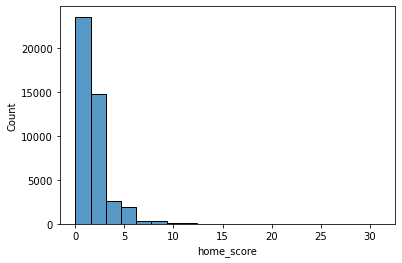

In [77]:
sns.histplot(x='home_score', data=df, bins=20)

<AxesSubplot:xlabel='away_score', ylabel='Count'>

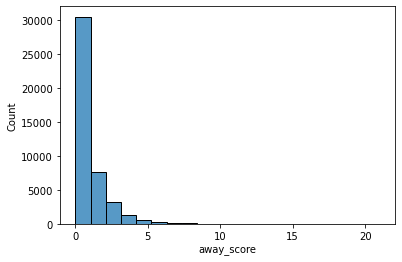

In [78]:
sns.histplot(x='away_score', data=df, bins=20)

In [79]:
df.sort_values(by='home_score', ascending=False).head(20)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
23969,2001-04-11,Australia,American Samoa,31,0,FIFA World Cup qualification,Coffs Harbour,Australia,False
8010,1971-09-13,Tahiti,Cook Islands,30,0,South Pacific Games,Papeete,French Polynesia,False
11111,1979-08-30,Fiji,Kiribati,24,0,South Pacific Games,Nausori,Fiji,False
23966,2001-04-09,Australia,Tonga,22,0,FIFA World Cup qualification,Coffs Harbour,Australia,False
29005,2006-11-24,Sápmi,Monaco,21,1,Viva World Cup,Hyères,France,True
6140,1966-04-03,Libya,Oman,21,0,Arab Cup,Baghdad,Iraq,True
22740,2000-02-14,Kuwait,Bhutan,20,0,AFC Asian Cup qualification,Kuwait City,Kuwait,False
23628,2000-11-24,Iran,Guam,19,0,FIFA World Cup qualification,Tabriz,Iran,False
25862,2003-06-29,Gibraltar,Sark,19,0,Island Games,St. Martin,Guernsey,True
22653,2000-01-26,China PR,Guam,19,0,AFC Asian Cup qualification,Hanoi,Vietnam,True


<AxesSubplot:ylabel='Density'>

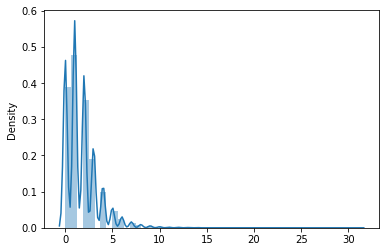

In [80]:
sns.distplot(x=df['home_score'])

<AxesSubplot:xlabel='home_score', ylabel='Density'>

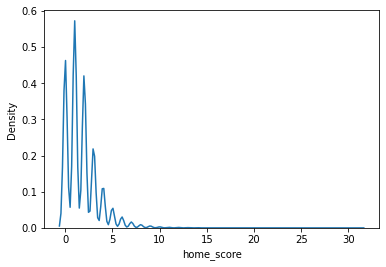

In [81]:
sns.kdeplot(x='home_score', data=df)

<AxesSubplot:xlabel='home_score', ylabel='count'>

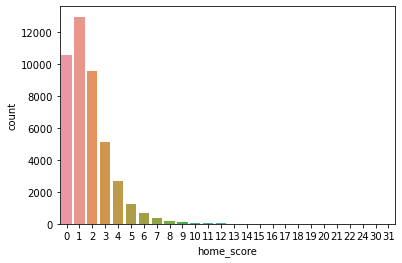

In [82]:
sns.countplot(x='home_score', data=df)

In [83]:
from scipy.stats import poisson

In [84]:
poisson.pmf(3, 1.1)

0.07384190206702398

In [85]:
def winner(home_score, away_score):
    if home_score > away_score:
        return 'home_win'
    elif home_score < away_score:
        return 'home_lose'        
    else:
        return 'draw'
    
df['winner'] = df.apply(lambda x: winner(x.home_score, x.away_score), axis=1)

In [86]:
df.groupby(['winner']).agg({'date':'count'})

,date
winner,
draw,10084
home_lose,12376
home_win,21292


In [87]:
predictors = ['home_team', 'away_team']

X = pd.get_dummies(df[predictors])
y = df['winner']

In [88]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, max_depth=7)

model.fit(X, y)

RandomForestClassifier(max_depth=7)

In [89]:
from sklearn.metrics import classification_report

print(classification_report(y, model.predict(X)))

              precision    recall  f1-score   support

        draw       0.00      0.00      0.00     10084
   home_lose       0.86      0.02      0.04     12376
    home_win       0.49      1.00      0.66     21292

    accuracy                           0.49     43752
   macro avg       0.45      0.34      0.23     43752
weighted avg       0.48      0.49      0.33     43752



In [90]:
precision = .81
recall = .02

In [91]:
1 / (((1/precision) + (1/recall))/2)

0.03903614457831325

In [92]:
2 / (1/precision + 1/recall)

0.03903614457831325

In [93]:
X.query('home_team_Morocco==1 and away_team_England==1')

,home_team_Abkhazia,home_team_Afghanistan,home_team_Albania,home_team_Alderney,home_team_Algeria,home_team_American Samoa,home_team_Andalusia,home_team_Andorra,home_team_Angola,home_team_Anguilla,...,away_team_Western Sahara,away_team_Yemen,away_team_Yemen DPR,away_team_Ynys Môn,away_team_Yorkshire,away_team_Yugoslavia,away_team_Zambia,away_team_Zanzibar,away_team_Zimbabwe,away_team_Åland Islands
21435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
model.predict_proba(X.iloc[[21435]])

array([[0.24180804, 0.34313747, 0.41505449]])

In [95]:
X.query('away_team_Morocco==1 and home_team_England==1')

,home_team_Abkhazia,home_team_Afghanistan,home_team_Albania,home_team_Alderney,home_team_Algeria,home_team_American Samoa,home_team_Andalusia,home_team_Andorra,home_team_Angola,home_team_Anguilla,...,away_team_Western Sahara,away_team_Yemen,away_team_Yemen DPR,away_team_Ynys Môn,away_team_Yorkshire,away_team_Yugoslavia,away_team_Zambia,away_team_Zanzibar,away_team_Zimbabwe,away_team_Åland Islands
14385,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
model.predict_proba(X.iloc[[14385]])

array([[0.23082592, 0.264318  , 0.50485608]])

In [97]:
x_pred = pd.get_dummies(pd.DataFrame({'home_team':['Morocco'], 'away_team':['England']}))

In [98]:
import warnings
warnings.filterwarnings('ignore')

for col in X.columns:
    if col not in x_pred.columns:
        x_pred[col] = 0

In [99]:
model.predict_proba(x_pred[X.columns])

array([[0.24180804, 0.34313747, 0.41505449]])

In [100]:
fr = pd.read_csv('D:/projet/ODC-World-Cup-2022-Predictions/data/fifa_ranking.csv')

In [101]:
fr.rank_date.max()

'2022-10-06'

In [102]:
df.head(2)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,home_win


In [103]:
df['year'] = df.apply(lambda x: x.date[:4], axis=1)
df['month'] = df.apply(lambda x: x.date[5:7], axis=1)

In [104]:
fr['year'] = fr.apply(lambda x: x.rank_date[:4], axis=1)
fr['month'] = fr.apply(lambda x: x.rank_date[5:7], axis=1)

In [105]:
df.groupby('month').agg({'date':['min', 'max']})

date            
              min         max
month                        
01     1879-01-18  2022-01-30
02     1881-02-26  2022-02-06
03     1873-03-08  2022-03-30
04     1879-04-05  2022-04-27
05     1902-05-03  2022-05-31
06     1903-06-11  2022-06-14
07     1902-07-20  2021-07-29
08     1905-08-15  2021-08-29
09     1888-09-19  2021-09-30
10     1902-10-12  2021-10-27
11     1872-11-30  2021-11-30
12     1911-12-17  2021-12-31

In [106]:
fr.query('country_full=="Morocco"')

,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date,year,month
135,41,Morocco,MAR,32.00,0.00,0,CAF,1992-12-31,1992,12
237,33,Morocco,MAR,40.00,32.00,-8,CAF,1993-08-08,1993,08
388,32,Morocco,MAR,42.00,40.00,-1,CAF,1993-09-23,1993,09
481,30,Morocco,MAR,43.00,42.00,-2,CAF,1993-10-22,1993,10
688,30,Morocco,MAR,44.00,43.00,0,CAF,1993-11-19,1993,11
...,...,...,...,...,...,...,...,...,...,...
62939,24,Morocco,MAR,1547.42,1529.93,-4,CAF,2022-02-10,2022,02
63225,24,Morocco,MAR,1551.88,1547.42,0,CAF,2022-03-31,2022,03
63340,22,Morocco,MAR,1558.90,1551.88,-2,CAF,2022-06-23,2022,06
63648,23,Morocco,MAR,1558.35,1558.90,1,CAF,2022-08-25,2022,08


<AxesSubplot:xlabel='rank_date', ylabel='rank'>

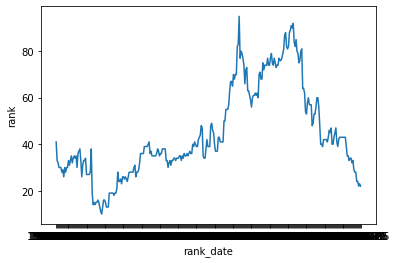

In [107]:
sns.lineplot(x='rank_date', y='rank', data=fr.query('country_full=="Morocco"'))


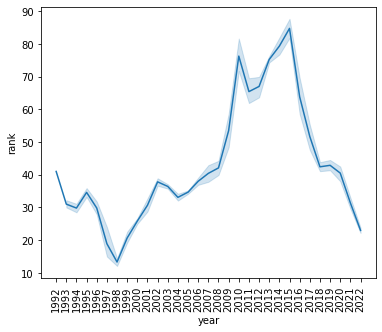

In [108]:
plt.figure(figsize=(6, 5))
sns.lineplot(x='year', y='rank', data=fr.query('country_full=="Morocco"'))
plt.xticks(rotation=90)
plt.show()

In [109]:
fr['rank'].max()

211

In [110]:
fr.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'confederation', 'rank_date', 'year',
       'month'],
      dtype='object')

In [111]:
fr.query('total_points>0')

,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date,year,month
0,1,Germany,GER,57.00,0.00,0,UEFA,1992-12-31,1992,12
1,96,Syria,SYR,11.00,0.00,0,AFC,1992-12-31,1992,12
2,97,Burkina Faso,BFA,11.00,0.00,0,CAF,1992-12-31,1992,12
3,99,Latvia,LVA,10.00,0.00,0,UEFA,1992-12-31,1992,12
4,100,Burundi,BDI,10.00,0.00,0,CAF,1992-12-31,1992,12
...,...,...,...,...,...,...,...,...,...,...
63911,74,El Salvador,SLV,1330.51,1333.48,3,CONCACAF,2022-10-06,2022,10
63912,75,Oman,OMA,1320.29,1323.03,0,AFC,2022-10-06,2022,10
63913,76,Israel,ISR,1316.55,1316.35,0,UEFA,2022-10-06,2022,10
63914,78,Georgia,GEO,1307.34,1296.46,-4,UEFA,2022-10-06,2022,10


In [112]:
fr.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'confederation', 'rank_date', 'year',
       'month'],
      dtype='object')

In [113]:
data = df.merge(fr, left_on=['home_team', 'year', 'month'], 
                right_on=['country_full', 'year', 'month'], 
               suffixes=('', '__home'))

In [114]:
data = data.merge(fr, left_on=['away_team', 'year', 'month'], 
                right_on=['country_full', 'year', 'month'], 
               suffixes=('', '__away'))

In [115]:
data.head(2)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,...,confederation,rank_date,rank__away,country_full__away,country_abrv__away,total_points__away,previous_points__away,rank_change__away,confederation__away,rank_date__away
0,1992-12-01,Saudi Arabia,United Arab Emirates,0,1,Gulf Cup,Doha,Qatar,True,home_lose,...,AFC,1992-12-31,59,United Arab Emirates,UAE,25.0,0.0,0,AFC,1992-12-31
1,1992-12-06,Qatar,United Arab Emirates,1,0,Gulf Cup,Doha,Qatar,False,home_win,...,AFC,1992-12-31,59,United Arab Emirates,UAE,25.0,0.0,0,AFC,1992-12-31


In [116]:
#data
#data_dup

dt = pd.concat([data, data_dup])

NameError: name 'data_dup' is not defined

In [118]:
data.head(500).tail(3)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,...,confederation,rank_date,rank__away,country_full__away,country_abrv__away,total_points__away,previous_points__away,rank_change__away,confederation__away,rank_date__away
497,1994-11-10,Saudi Arabia,Bahrain,3,1,Gulf Cup,Abu Dhabi,United Arab Emirates,True,home_win,...,AFC,1994-11-22,71,Bahrain,BHR,26.0,21.0,-13,AFC,1994-11-22
498,1994-11-16,United Arab Emirates,Oman,2,0,Gulf Cup,Abu Dhabi,United Arab Emirates,False,home_win,...,AFC,1994-11-22,72,Oman,OMA,25.0,27.0,7,AFC,1994-11-22
499,1994-11-09,Qatar,Oman,4,2,Gulf Cup,Abu Dhabi,United Arab Emirates,True,home_win,...,AFC,1994-11-22,72,Oman,OMA,25.0,27.0,7,AFC,1994-11-22


In [119]:
fr.query('year=="2022" and month=="08"').sort_values(by='rank', ascending=True)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date,year,month
63494,1,Brazil,BRA,1837.56,1837.56,0,CONMEBOL,2022-08-25,2022,08
63495,2,Belgium,BEL,1821.92,1821.92,0,UEFA,2022-08-25,2022,08
63653,3,Argentina,ARG,1770.65,1770.65,0,CONMEBOL,2022-08-25,2022,08
63629,4,France,FRA,1764.85,1764.85,0,UEFA,2022-08-25,2022,08
63630,5,England,ENG,1737.46,1737.46,0,UEFA,2022-08-25,2022,08
...,...,...,...,...,...,...,...,...,...,...
63566,207,Sri Lanka,SRI,825.25,825.25,0,AFC,2022-08-25,2022,08
63567,208,US Virgin Islands,VIR,823.97,823.97,0,CONCACAF,2022-08-25,2022,08
63568,209,British Virgin Islands,VGB,809.32,809.32,0,CONCACAF,2022-08-25,2022,08
63569,210,Anguilla,AIA,790.74,790.74,0,CONCACAF,2022-08-25,2022,08


<AxesSubplot:xlabel='rank'>

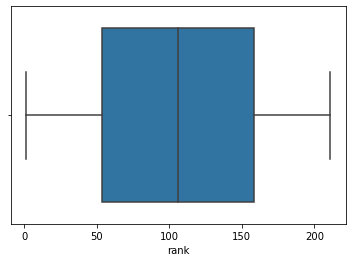

In [120]:
sns.boxplot(x='rank', data=fr.query('year=="2022" and month=="08"').sort_values(by='rank', ascending=True))

<AxesSubplot:xlabel='total_points', ylabel='Count'>

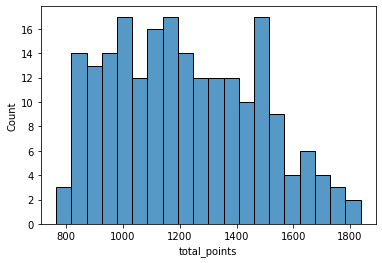

In [121]:
sns.histplot(x='total_points', data=fr.query('year=="2022" and month=="08"').sort_values(by='rank', ascending=True), bins=20)

In [122]:
data['home_tier'] = ''
data.loc[data['rank'] > 32, 'home_tier'] = 'bronze'
data.loc[data['rank'] <= 32, 'home_tier'] = 'silver'
data.loc[data['rank'] <= 16, 'home_tier'] = 'gold'
data.loc[data['rank'] <= 8, 'home_tier'] = 'diamond'

In [123]:
data['away_tier'] = ''
data.loc[data['rank__away'] > 32, 'away_tier'] = 'bronze'
data.loc[data['rank__away'] <= 32, 'away_tier'] = 'silver'
data.loc[data['rank__away'] <= 16, 'away_tier'] = 'gold'
data.loc[data['rank__away'] <= 8, 'away_tier'] = 'diamond'

In [124]:
data.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'winner', 'year', 'month',
       'rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'confederation', 'rank_date',
       'rank__away', 'country_full__away', 'country_abrv__away',
       'total_points__away', 'previous_points__away', 'rank_change__away',
       'confederation__away', 'rank_date__away', 'home_tier', 'away_tier'],
      dtype='object')

In [125]:
data.groupby(['home_tier', 'winner']).agg({'date':'count'})

date
home_tier winner         
bronze    draw       3624
          home_lose  4560
          home_win   6393
diamond   draw        275
          home_lose   188
          home_win    922
gold      draw        263
          home_lose   206
          home_win    702
silver    draw        483
          home_lose   425
          home_win   1258

In [126]:
data['home_win'] = (data['winner'] == 'home_win').astype(int)


<AxesSubplot:xlabel='home_tier', ylabel='home_win'>

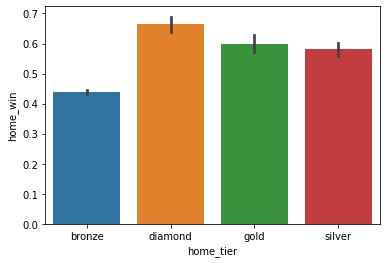

In [127]:
sns.barplot(x='home_tier', y='home_win', data=data)

In [128]:
#df.tournament.unique()

tournaments = ['Copa América', 'FIFA World Cup', 'FIFA World Cup qualification', 'International Cup'
              , 'AFC Asian Cup qualification', 'AFC Asian Cup', 'African Cup of Nations'
              , 'UEFA Euro qualification', 'UEFA Euro', 'African Cup of Nations qualification'
              , 'CONCACAF Championship', 'CONCACAF Championship qualification' 
              , 'CONMEBOL–UEFA Cup of Champions', 'Confederations Cup'
              , 'Oceania Nations Cup qualification','Copa América qualification'
              , 'UEFA Nations League', 'CONCACAF Nations League qualification'
              , 'CONCACAF Nations League','AFF Championship qualification']

In [129]:
df.loc[df.tournament.isin(tournaments), ].groupby('neutral').agg({'date':'count'})

,date
neutral,
False,13654
True,3761


In [130]:
data.query('winner!="draw" and neutral==True').groupby(['home_tier', 'away_tier']).agg({'home_win':['count', 'mean']})

home_win          
                       count      mean
home_tier away_tier                   
bronze    bronze        2260  0.546903
          diamond         65  0.076923
          gold            48  0.104167
          silver         181  0.303867
diamond   bronze         107  0.878505
          diamond         70  0.528571
          gold            52  0.673077
          silver          66  0.712121
gold      bronze          80  0.812500
          diamond         42  0.333333
          gold            27  0.592593
          silver          36  0.611111
silver    bronze         214  0.799065
          diamond         31  0.161290
          gold            26  0.230769
          silver          69  0.492754

In [131]:
data['marginal_effect'] = (data['total_points'] - data['total_points__away']) / data['total_points__away']

<AxesSubplot:xlabel='marginal_effect'>

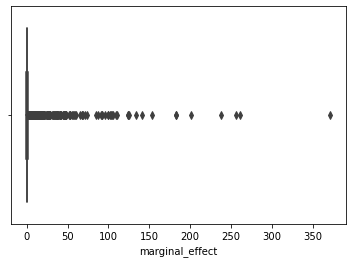

In [132]:
sns.boxplot(x='marginal_effect', data=data)

<AxesSubplot:xlabel='winner', ylabel='marginal_effect'>

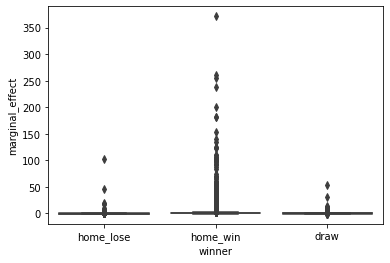

In [133]:
sns.boxplot(x='winner', y='marginal_effect', data=data)

<AxesSubplot:xlabel='marginal_effect', ylabel='Density'>

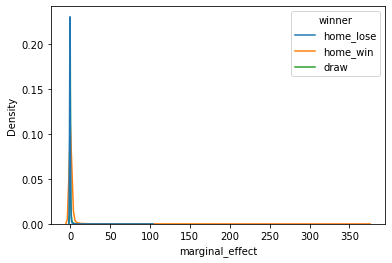

In [134]:
sns.kdeplot(x='marginal_effect', hue='winner', data=data)

In [135]:
data['effect_tier'] = ''
data.loc[data.marginal_effect < -.37, 'effect_tier'] = 'low'
data.loc[data.marginal_effect >= -.37, 'effect_tier'] = 'medium'
data.loc[data.marginal_effect >= -.20, 'effect_tier'] = 'high'
data.loc[data.marginal_effect >= .25, 'effect_tier'] = 'very_high'

In [136]:
data.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,...,total_points__away,previous_points__away,rank_change__away,confederation__away,rank_date__away,home_tier,away_tier,home_win,marginal_effect,effect_tier
0,1992-12-01,Saudi Arabia,United Arab Emirates,0,1,Gulf Cup,Doha,Qatar,True,home_lose,...,25.0,0.0,0,AFC,1992-12-31,bronze,bronze,0,0.120000,high
1,1992-12-06,Qatar,United Arab Emirates,1,0,Gulf Cup,Doha,Qatar,False,home_win,...,25.0,0.0,0,AFC,1992-12-31,bronze,bronze,1,0.080000,high
2,1992-12-04,Bahrain,United Arab Emirates,0,2,Gulf Cup,Doha,Qatar,True,home_lose,...,25.0,0.0,0,AFC,1992-12-31,bronze,bronze,0,-0.480000,low
3,1992-12-09,Oman,United Arab Emirates,0,1,Gulf Cup,Doha,Qatar,True,home_lose,...,25.0,0.0,0,AFC,1992-12-31,bronze,bronze,0,-0.760000,low
4,1992-12-01,Qatar,Bahrain,1,0,Gulf Cup,Doha,Qatar,False,home_win,...,13.0,0.0,0,AFC,1992-12-31,bronze,bronze,1,1.076923,very_high


In [137]:
data['match_importance'] = np.exp((data['year'].astype(int) - 2022)/8)

<AxesSubplot:xlabel='match_importance'>

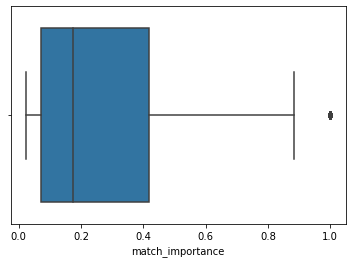

In [138]:
sns.boxplot(x='match_importance', data=data)

In [139]:
data.sort_values(by='match_importance', ascending=False)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,...,previous_points__away,rank_change__away,confederation__away,rank_date__away,home_tier,away_tier,home_win,marginal_effect,effect_tier,match_importance
19298,2022-06-13,Sierra Leone,Guinea-Bissau,2,2,African Cup of Nations qualification,Conakry,Guinea,True,draw,...,1158.62,0,CAF,2022-06-23,bronze,bronze,0,0.002084,high,1.000000
19091,2022-06-02,Estonia,San Marino,2,0,UEFA Nations League,Tallinn,Estonia,False,home_win,...,776.97,0,UEFA,2022-06-23,bronze,bronze,1,0.541463,very_high,1.000000
19015,2022-03-29,Qatar,Slovenia,0,0,Friendly,Al Rayyan,Qatar,False,draw,...,1375.42,1,UEFA,2022-03-31,bronze,bronze,0,0.045841,high,1.000000
19016,2022-03-29,Croatia,Bulgaria,2,1,Friendly,Al Rayyan,Qatar,True,home_win,...,1345.47,2,UEFA,2022-03-31,gold,bronze,1,0.210886,high,1.000000
19017,2022-03-26,Qatar,Bulgaria,2,1,Friendly,Al Rayyan,Qatar,False,home_win,...,1345.47,2,UEFA,2022-03-31,bronze,bronze,1,0.076659,high,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24,1992-12-16,Spain,Latvia,5,0,FIFA World Cup qualification,Seville,Spain,False,home_win,...,0.00,0,UEFA,1992-12-31,gold,bronze,1,3.900000,very_high,0.023518
23,1992-12-20,Guinea,Kenya,4,0,FIFA World Cup qualification,Conakry,Guinea,False,home_win,...,0.00,0,CAF,1992-12-31,bronze,bronze,1,0.411765,very_high,0.023518
22,1992-12-16,Guinea,Sierra Leone,0,0,Friendly,Conakry,Guinea,False,draw,...,0.00,0,CAF,1992-12-31,bronze,bronze,0,0.500000,very_high,0.023518
21,1992-12-20,Uruguay,Germany,1,4,Friendly,Montevideo,Uruguay,False,home_lose,...,0.00,0,UEFA,1992-12-31,gold,diamond,0,-0.157895,high,0.023518


<AxesSubplot:xlabel='month', ylabel='home_win'>

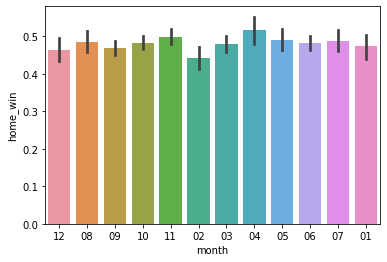

In [140]:
sns.barplot(x='month', y='home_win', data=data)

In [141]:
data.head(3)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,...,previous_points__away,rank_change__away,confederation__away,rank_date__away,home_tier,away_tier,home_win,marginal_effect,effect_tier,match_importance
0,1992-12-01,Saudi Arabia,United Arab Emirates,0,1,Gulf Cup,Doha,Qatar,True,home_lose,...,0.0,0,AFC,1992-12-31,bronze,bronze,0,0.12,high,0.023518
1,1992-12-06,Qatar,United Arab Emirates,1,0,Gulf Cup,Doha,Qatar,False,home_win,...,0.0,0,AFC,1992-12-31,bronze,bronze,1,0.08,high,0.023518
2,1992-12-04,Bahrain,United Arab Emirates,0,2,Gulf Cup,Doha,Qatar,True,home_lose,...,0.0,0,AFC,1992-12-31,bronze,bronze,0,-0.48,low,0.023518


In [142]:
predictors = ['home_team', 'away_team', 'neutral', 'confederation', 'confederation__away'
              , 'home_tier', 'away_tier', 'marginal_effect', 'effect_tier', 'match_importance']



In [143]:
data['year_int'] = data['year'].astype(int)

In [144]:
data_train = data.loc[data.tournament.isin(tournaments) & (data.year_int < 2016), ] 
data_test = data.loc[data.tournament.isin(tournaments) & (data.year_int >= 2016), ]

In [145]:
X = pd.get_dummies(data_train[predictors])
y = data_train['winner']

In [146]:
# equilibrer le model

from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=0)
X, y = sm.fit_sample(X, y)


In [147]:
import xgboost as xgb

In [168]:
model = xgb.XGBClassifier()
model.fit(X, y)


[20:08:30] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [169]:

print(classification_report(y, model.predict(X)))

              precision    recall  f1-score   support

        draw       0.74      0.77      0.76      3453
   home_lose       0.79      0.75      0.77      3453
    home_win       0.82      0.82      0.82      3453

    accuracy                           0.78     10359
   macro avg       0.78      0.78      0.78     10359
weighted avg       0.78      0.78      0.78     10359



In [170]:
model.get_params

<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)>

In [171]:
model = xgb.XGBClassifier(n_estimators=100, max_depth=None, subsample=1, colsample_bytree=1,random_state=0)

model.fit(X, y)

print(classification_report(y, model.predict(X)))

[20:09:09] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

        draw       0.74      0.77      0.76      3453
   home_lose       0.79      0.75      0.77      3453
    home_win       0.82      0.82      0.82      3453

    accuracy                           0.78     10359
   macro avg       0.78      0.78      0.78     10359
weighted avg       0.78      0.78      0.78     10359



In [172]:
from sklearn.model_selection import GridSearchCV

grid = {
    'n_estimators' : [6],
    'max_depth' : [None],
    'subsample' : [.3],
    'colsample_bytree' : [1]
}

model = xgb.XGBClassifier(random_state=0)

clf = GridSearchCV(model, grid, scoring='accuracy')

clf.fit(X, y)

[20:09:42] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:09:44] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:09:46] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:09:48] WARNI

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=0, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
               

In [173]:
clf.best_params_


{'colsample_bytree': 1, 'max_depth': None, 'n_estimators': 6, 'subsample': 0.3}

In [174]:
print('avec optimization \n',classification_report(y, clf.best_estimator_.predict(X)))



avec optimization 
               precision    recall  f1-score   support

        draw       0.54      0.51      0.52      3453
   home_lose       0.66      0.67      0.66      3453
    home_win       0.68      0.71      0.69      3453

    accuracy                           0.63     10359
   macro avg       0.63      0.63      0.63     10359
weighted avg       0.63      0.63      0.63     10359



In [175]:
model = clf.best_estimator_

import joblib

joblib.dump(model, 'FIFA2022_predictors.mdl')

['FIFA2022_predictors.mdl']

In [176]:
predictors

['home_team',
 'away_team',
 'neutral',
 'confederation',
 'confederation__away',
 'home_tier',
 'away_tier',
 'marginal_effect',
 'effect_tier',
 'match_importance']

In [177]:
#Morocco 1558.35
#Brazil 1837.56

marginal_effect = (1558.35 - 1837.56) / 1837.56

In [178]:
match = ['Morocco', 'Brazil', True, 'CAF', 'CONMEBOL', 'silver', 'diamond', marginal_effect, 'high', 1]

In [179]:
match

['Morocco',
 'Brazil',
 True,
 'CAF',
 'CONMEBOL',
 'silver',
 'diamond',
 -0.15194605890419907,
 'high',
 1]

In [180]:
d_match = pd.DataFrame([match], columns=predictors)
d_match

,home_team,away_team,neutral,confederation,confederation__away,home_tier,away_tier,marginal_effect,effect_tier,match_importance
0,Morocco,Brazil,True,CAF,CONMEBOL,silver,diamond,-0.151946,high,1


In [181]:
x_match = pd.get_dummies(d_match[predictors])

In [182]:
for col in X.columns:
    if col not in x_match:
        x_match[col] = 0

In [183]:
model.predict_proba(x_match[X.columns])

array([[0.2812338 , 0.44319665, 0.2755695 ]], dtype=float32)

In [184]:
predictors

['home_team',
 'away_team',
 'neutral',
 'confederation',
 'confederation__away',
 'home_tier',
 'away_tier',
 'marginal_effect',
 'effect_tier',
 'match_importance']

In [185]:
model.predict(x_match[X.columns])

array(['home_lose'], dtype=object)

In [186]:
data.iloc[[0]][predictors]

,home_team,away_team,neutral,confederation,confederation__away,home_tier,away_tier,marginal_effect,effect_tier,match_importance
0,Saudi Arabia,United Arab Emirates,True,AFC,AFC,bronze,bronze,0.12,high,0.023518


In [187]:
#Morocco 1558.35
#Brazil 1837.56

marginal_effect = (1558.35 - 1837.56) / 1837.56

In [188]:
data.query('home_team=="Morocco" or away_team=="Morocco"').sort_values(by='date', ascending=False)[['date', 'home_team', 'home_tier', 'total_points', 'away_team', 'away_tier', 'total_points__away']]

,date,home_team,home_tier,total_points,away_team,away_tier,total_points__away
19295,2022-06-13,Morocco,silver,1558.90,Liberia,bronze,1047.36
19294,2022-06-09,Morocco,silver,1558.90,South Africa,bronze,1347.91
18853,2021-12-11,Morocco,silver,1529.93,Algeria,silver,1516.51
18851,2021-12-07,Morocco,silver,1529.93,Saudi Arabia,bronze,1434.71
18879,2021-12-04,Jordan,bronze,1255.69,Morocco,silver,1529.93
...,...,...,...,...,...,...,...
187,1994-02-02,Egypt,silver,46.00,Morocco,silver,44.00
107,1993-10-10,Morocco,silver,43.00,Zambia,silver,45.00
105,1993-10-01,Morocco,silver,43.00,Gabon,bronze,32.00
93,1993-09-15,Morocco,silver,42.00,Mali,bronze,27.00


In [189]:
model.predict(X.head(2))

array(['home_win', 'home_lose'], dtype=object)

In [190]:
clf.best_params_

{'colsample_bytree': 1, 'max_depth': None, 'n_estimators': 6, 'subsample': 0.3}

In [191]:
X.columns

Index(['neutral', 'marginal_effect', 'match_importance',
       'home_team_Afghanistan', 'home_team_Albania', 'home_team_Algeria',
       'home_team_American Samoa', 'home_team_Andorra', 'home_team_Angola',
       'home_team_Anguilla',
       ...
       'home_tier_gold', 'home_tier_silver', 'away_tier_bronze',
       'away_tier_diamond', 'away_tier_gold', 'away_tier_silver',
       'effect_tier_high', 'effect_tier_low', 'effect_tier_medium',
       'effect_tier_very_high'],
      dtype='object', length=411)

In [192]:
X_test = pd.get_dummies(data_test[predictors])

In [193]:
for col in X.columns:
    if col not in X_test.columns:
        X_test[col] = 0

In [194]:
print(classification_report(data_test['winner'], clf.best_estimator_.predict(X_test[X.columns])))

              precision    recall  f1-score   support

        draw       0.28      0.07      0.11       545
   home_lose       0.58      0.49      0.53       708
    home_win       0.58      0.85      0.69      1108

    accuracy                           0.56      2361
   macro avg       0.48      0.47      0.44      2361
weighted avg       0.51      0.56      0.51      2361



In [195]:
d_points = fr.query('year=="2022" and month=="08"')[['rank', 'country_full', 'total_points']]

In [196]:
def marginal_effect(home_team, away_team):
    home_points = d_points.loc[d_points.country_full==home_team, 'total_points'].iloc[0]
    away_points = d_points.loc[d_points.country_full==away_team, 'total_points'].iloc[0]
    
    return (home_points - away_points) / away_points

In [197]:
marginal_effect('Morocco', 'Brazil')

-0.15194605890419907

In [198]:
d_rank = fr.query('year=="2022" and month=="08"')

In [199]:
def confederation(team):
    return d_rank.loc[d_rank.country_full==team, 'confederation'].iloc[0]

In [200]:
confederation('Brazil')

'CONMEBOL'

In [201]:
fr.groupby(['country_full', 'confederation']).agg({'rank':'count'}).reset_index().sort_values(by='rank', ascending=False)

,country_full,confederation,rank
223,Zimbabwe,CAF,322
157,Portugal,UEFA,322
98,Israel,UEFA,322
97,Iraq,AFC,322
96,Indonesia,AFC,322
...,...,...,...
193,São Tomé and Príncipe,CAF,23
33,Cabo Verde,CAF,23
56,Czechoslovakia,UEFA,6
207,Türkiye,UEFA,2


In [202]:
fr.query('country_full=="Israel"').confederation.unique()

array(['UEFA'], dtype=object)

In [203]:
def get_tier(team):
    r = d_rank.loc[d_rank.country_full==team, 'rank'].iloc[0]
    if r <= 8:
        return 'diamond'
    elif r <= 16:
        return 'gold'
    elif r <= 32:
        return 'silver'
    else:
        return 'bronze'

In [204]:
get_tier('Brazil')

'diamond'

In [205]:
def get_neutral(home_team, away_team):
    """this function returns if the game is neutral

    Arguments:
        home_team {str} -- home team
        away_team {str} -- away team

    Returns:
        bool -- Yes or No the game is neutral
    """
    if home_team=="Qatar":
        return False
    elif away_team=="Qatar":
        return False
    else:
        return True

#--------------------------------------------------------------------------------------------


def get_confederation(team):
    """the confederation of the team

    Arguments:
        team {str} -- The team

    Returns:
        str -- Confederation of the team
    """
    conf = fr.loc[fr.country_full==team, 'confederation'].unique()[0]
    return conf



#-------------------------------------------------------------------------------------------



def get_tier(team):
    """_ the tier of the team

    Args:
        team (str): the team

    Returns:
        str: tier of the team
    """
    r = fr.loc[(fr.country_full==team) & (fr.year=="2022") & (fr.month=="08"), 'rank'].iloc[0]
    if r <= 8:
        return 'diamond'
    elif r <= 16:
        return 'gold'
    elif r <= 32:
        return 'silver'
    else:
        return 'bronze'
    
    
    
#--------------------------------------------------------------------------------------------


def marginal_effect(home_team, away_team):
    """_ marginal effect

    Args:
        home_team (str): home team
        away_team (str): away team
    Returns:
        float: marginal effect 
    """
    home_points = fr.loc[(fr.country_full==home_team) & (fr.year=="2022") & (fr.month=="08"), 'total_points'].iloc[0]
    away_points = fr.loc[(fr.country_full==away_team) & (fr.year=="2022") & (fr.month=="08"), 'total_points'].iloc[0]
    
    return (home_points - away_points) / away_points


#--------------------------------------------------------------------------------------------



def effect_tier(home_team, away_team):
    
    """based on marginal_effect we classify teams _very__high, high, medium, low_

        Arguments:
            home_team {str} -- The home team
            away_team {str} -- The away team

        Returns:
            str -- effect tier "low" or "medium" or "high" or "very high"
        """

    marginal_eff = marginal_effect(home_team, away_team)

    if marginal_eff < -0.37:
        return 'low'
    elif marginal_eff >=-0.37 and marginal_eff < -0.20:
        return 'medium'
    elif marginal_eff >=-0.20 and marginal_eff < -0.25:
        return 'high'
    else:
        return 'very_high'


def get_match(home_team, away_team, predictors, xcols):
    #home_team
    #away_team

    neutral = get_neutral(home_team, away_team)
    confederation = get_confederation(home_team)
    confederation__away = get_confederation(away_team)
    home_tier = get_tier(home_team)
    away_tier = get_tier(away_team)
    marginal_effect_ = marginal_effect(home_team, away_team)
    effect_tier_ = effect_tier(home_team, away_team)
    match_importance=1

    match = [home_team, away_team, neutral, confederation, confederation__away, home_tier, away_tier, marginal_effect_, effect_tier_,match_importance]
    d_match = pd.DataFrame([match], columns=predictors)

    x_match = pd.get_dummies(d_match)

    for col in xcols:
        if col not in x_match:
            x_match[col] = 0

    return x_match[xcols]



In [206]:
X_ = pd.get_dummies(data[predictors])

In [207]:
predictors

['home_team',
 'away_team',
 'neutral',
 'confederation',
 'confederation__away',
 'home_tier',
 'away_tier',
 'marginal_effect',
 'effect_tier',
 'match_importance']

In [208]:
match=get_match('Morocco', 'Brazil', predictors, X.columns)

In [209]:
match

,neutral,marginal_effect,match_importance,home_team_Afghanistan,home_team_Albania,home_team_Algeria,home_team_American Samoa,home_team_Andorra,home_team_Angola,home_team_Anguilla,...,home_tier_gold,home_tier_silver,away_tier_bronze,away_tier_diamond,away_tier_gold,away_tier_silver,effect_tier_high,effect_tier_low,effect_tier_medium,effect_tier_very_high
0,True,-0.151946,1,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [210]:
clf.best_estimator_.predict(match)

array(['home_lose'], dtype=object)

In [211]:
predictors = ['home_team', 'away_team', 'neutral', 'confederation', 'confederation__away'
              , 'home_tier', 'away_tier', 'marginal_effect', 'effect_tier', 'match_importance']

meta_model = {
    'name' : 'Machine Learning model to predict FIFA World Cup 2022',
    'authors' : 'Team ODC Sep 2022 : @Karim @Salh @OMAR ...',
    'date' : '23/09/2022',
    'model' : clf.best_estimator_,
    'predictors' : predictors,
    'xcols' : X.columns
}
joblib.dump(meta_model, 'MetaModelFifa_predictors.mdl')


['MetaModelFifa_predictors.mdl']

In [212]:
meta = joblib.load('MetaModelFifa_predictors.mdl')

In [213]:
print(len(X.columns))

411


In [214]:
meta['model'].predict(match)[0]

'home_lose'

In [215]:
X.iloc[0]

neutral                     False
marginal_effect          0.272727
match_importance         0.023518
home_team_Afghanistan           0
home_team_Albania               0
                           ...   
away_tier_silver                0
effect_tier_high                0
effect_tier_low                 0
effect_tier_medium              0
effect_tier_very_high           1
Name: 0, Length: 411, dtype: object

In [216]:
for i in X_.columns:
    if i not in X.columns:
        print(i)

home_team_Curaçao
home_team_Gibraltar
home_team_Kosovo
home_team_North Macedonia
home_team_São Tomé and Príncipe
away_team_Curaçao
away_team_Gibraltar
away_team_Kosovo
away_team_North Macedonia
away_team_São Tomé and Príncipe


In [217]:
l=[]
for i in list(fr['country_full'].unique()):
    c=0
    for j in X.columns:
        if i in j:
          if c!=1:  
            l.append(i)
            c=1

In [218]:
l.sort()

In [219]:
meta_model = {
    'name' : 'Machine Learning model to predict FIFA World Cup 2022',
    'authors' : 'Team ODC Sep 2022 : @Karim @Salh @OMAR ...',
    'date' : '23/09/2022',
    'model' : clf.best_estimator_,
    'predictors' : predictors,
    'xcols' : X.columns,
    'country':l
}
joblib.dump(meta_model, 'MetaModelFifa_predictors.mdl')


['MetaModelFifa_predictors.mdl']

In [220]:
meta['model'].predict_proba(get_match('Brazil','Morocco',predictors,X.columns))

array([[0.28484955, 0.24900362, 0.4661469 ]], dtype=float32)

In [221]:
meta['model'].predict(get_match('Brazil','Morocco',predictors,X.columns))

array(['home_win'], dtype=object)

In [222]:
meta['model'].predict_proba(get_match('Morocco','Brazil',predictors,X.columns))

array([[0.3152904 , 0.34972337, 0.33498627]], dtype=float32)

In [223]:
def get_match_proba(home_team,away_team,model,predictors,xcols):
    pred={
        'draw':None,
        home_team:None,
        away_team:None
    }
    pred1=model.predict_proba(get_match(home_team,away_team,predictors,xcols))
    pred2=model.predict_proba(get_match(away_team,home_team,predictors,xcols))
    pred['draw']=(pred1[0][0]+pred2[0][0])/2
    pred[home_team]=(pred1[0][2]+pred2[0][1])/2
    pred[away_team]=(pred1[0][1]+pred2[0][2])/2
    return pred
    
def get_winner(home_team,away_team,model,predictors,xcols):
    dict=get_match_proba(home_team,away_team,model,predictors,xcols)
    max_prob=0
    for key,value in zip(dict.keys(),dict.values()):
        if(value>max_prob):
            win=key
            max_prob=value
    return win



In [224]:
meta['model'].predict_proba(get_match('Morocco','Brazil',predictors,X.columns))

array([[0.3152904 , 0.34972337, 0.33498627]], dtype=float32)

In [225]:
meta['model'].predict_proba(get_match('Brazil','Morocco',predictors,X.columns))

array([[0.28484955, 0.24900362, 0.4661469 ]], dtype=float32)

In [226]:
get_match_proba('Uganda','Germany',meta['model'],predictors,X.columns)


{'draw': 0.2562130093574524,
 'Uganda': 0.31174492835998535,
 'Germany': 0.43204206228256226}

In [227]:
get_winner('France','Brazil',meta['model'],predictors,X.columns)

'France'

In [228]:
get_match_proba('Morocco','Brazil',meta['model'],predictors,X.columns)


{'draw': 0.30006998777389526,
 'Morocco': 0.29199492931365967,
 'Brazil': 0.40793514251708984}

In [229]:
# https://www.kaggle.com/code/stpeteishii/qatar-2022-football-world-cup-schedule/data

teams = pd.read_csv('D:/projet/ODC-World-Cup-2022-Predictions/data/Qatar2022-teams.csv',sep=';')


In [230]:
meta_model = {
    'name' : 'Machine Learning model to predict FIFA World Cup 2022',
    'authors' : 'Team ODC Sep 2022 : @Karim @Salh @OMAR ...',
    'date' : '23/09/2022',
    'model' : clf.best_estimator_,
    'predictors' : predictors,
    'xcols' : X.columns,
    'country':list(teams['Team'])
}
joblib.dump(meta_model, 'MetaModelFifa_predictors.mdl')


['MetaModelFifa_predictors.mdl']